In [2]:
using PyPlot

In [3]:
alpha(r::Float64,k::Float64,l::Float64) = acos((r^2.0 + k^2.0 - l^2.0)/(2.0*k*r))    

alpha (generic function with 1 method)

In [4]:
beta(r::Float64,k::Float64,l::Float64) = acos((r^2.0 + l^2.0 - k^2.0)/(2.0*l*r))  

beta (generic function with 1 method)

In [5]:
function r(tau::Array{Float64},b::Float64,k::Float64,l::Float64,T::Float64)
    v = 2.0*sqrt((k+l)^2.0-b^2.0)/T
    return sqrt(b^2.0 .+ (v.*tau).^2.0)
end

r (generic function with 1 method)

In [6]:
tau(t::Array{Float64},P::Float64,t_n::Float64) = mod(t.-t_n+(P/2),P)-(P/2.0)

tau (generic function with 1 method)

In [7]:
function overlap(rs::Array{Float64},k::Float64,l::Float64)
    result = Float64[]
    for r in rs
        if r >= l+k
            push!(result,0.0)
        elseif r <= l-k
            push!(result,pi*k^2.0)
        else
            push!(result,(k^2.0)*(alpha(r,k,l)-cos(alpha(r,k,l))*sin(alpha(r,k,l)))+(l^2.0)*(beta(r,k,l)-cos(beta(r,k,l))*sin(beta(r,k,l))))
        end
    end
    return result
end

overlap (generic function with 1 method)

In [8]:
function transit(ts::Array{Float64},F_0::Float64,k::Float64,l::Float64,P::Float64,T::Float64,t_n::Float64,b::Float64)
    taus = tau(ts,P,t_n)
    rs = r(taus,b,k,l,T)
    overlaps = overlap(rs,k,l)
    return F_0*(1.0.-overlaps./(pi*l^2.0))
end

transit (generic function with 1 method)

In [9]:
function phase_folder(x,P)
    #phase-folds data to period P
    phase = mod(x, P)/P;
    return phase
end

function plot_transit(x_data,y_data,fit)
    #Outputs a phase folded normalized plot of light curve with best fit
    
    # need to get period from fit
    # P = fit [whatever parameter it may be]
    
    phase = phase_folder(x_data,P)    
    scatter(phase, y_data)
end

function density(fit)
    # given the fit, calculate the density of the star in solar density units
    # from Seager & Mallen-Ornelas 2003
    
    # need some code here to take the fit and divy up into parameters like period, etc.
    
    dflux = maximum(1-flux)
    
    Msun = 1.9891e33  # g
    Rsun = 6.955e10   # cm

    # factor to put it in units of sun
    factor = (365.25^2.0/215.^3.0)*(Msun / Rsun^3.0)
    rho = (factor/P^2.0) * ((1+sqrt(dflux))^2.0 -(b^2.0*(1-(sinpi(T/P))^2.0))/(sinpi(T/P)^2.0))^1.5
end

density (generic function with 1 method)

In [15]:
#Read in data, separate into arrays
data = readdlm("mystery_planet2.txt",Float64) 
time = data[:,1]
flux0 = data[:,2]
flux = flux0/maximum(flux0)
flux_err = data[:,3] ;

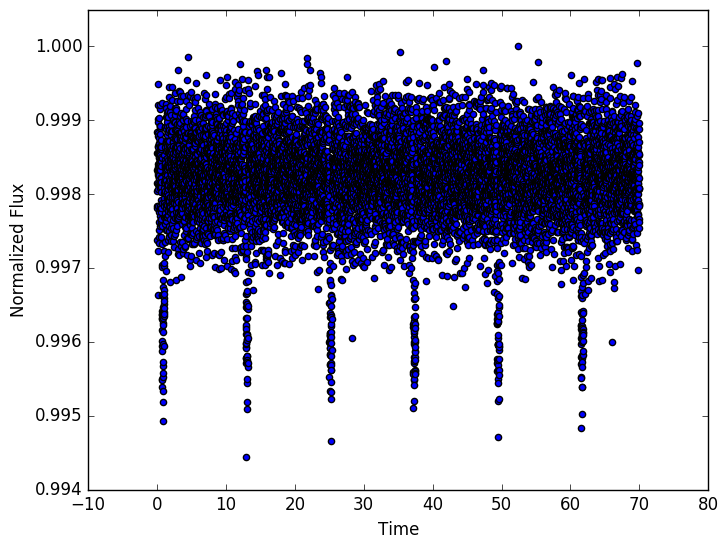

In [22]:
scatter(time, flux)
xlabel("Time (days)")
ylabel("Normalized Flux")
ylim(0.994,1.0005);

In [60]:
## test transit codes
ts = collect(linspace(0,40,1000))
F_0 = 1.
k = 1.
l = 1.
P = 12.
T = 1.
t_n = .7
b = 1.

1.0

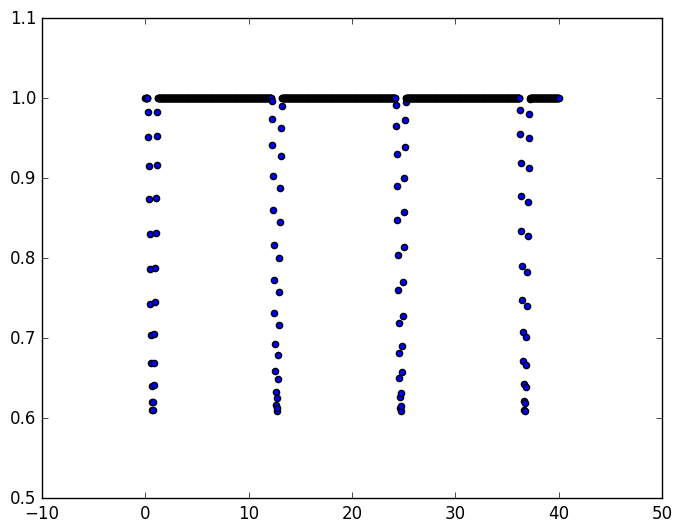

In [61]:
scatter(ts,transit(ts,F_0,k,l,P,T,t_n,b));

In [92]:
Msun = 1.9891e33  # g
Rsun = 6.955e10   # cm
    
ts = collect(linspace(0,40,1000))
F_0 = 1.
k = 1.
l = 1.
P = 12.0
T = 5.
t_n = .7
b = 1.
dflux = maximum(1-transit(ts,F_0,k,l,P,T,t_n,b))

# factor to put it in units of sun
factor = (365.25^2.0/215.^3.0)*(Msun / Rsun^3.0)
rho = (factor/P^2.0) * ((1+sqrt(dflux))^2.0 -(b^2.0*(1-(sinpi(T/P))^2.0))/(sinpi(T/P)^2.0))^1.5

0.002270476930946174

In [91]:
factor

0.07936523085894283